In [1]:
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# transit 157 - 177 (Q6)

In [2]:
kepler_17 = []
for i in range(177-157+1):
    txt = '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_'+str(157+i)+'.txt'
    kepler_17.append(txt)

kepler_17 = np.array(kepler_17)
print(kepler_17)

['/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_157.txt'
 '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_158.txt'
 '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_159.txt'
 '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_160.txt'
 '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_161.txt'
 '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_162.txt'
 '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_163.txt'
 '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_164.txt'
 '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_165.txt'
 '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_166.txt'
 '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_167.txt'
 '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_168.txt'
 '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_169.txt'
 '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_170.txt'
 '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_171.txt'
 '/sciproc/disk03/fiona/Kepler-17/2010265121752_slc_172.txt'
 '/sciproc/disk03/fiona/

In [3]:
'''gaussian fit'''
'''reference: https://stackoverflow.com/questions/19206332/gaussian-fit-for-python''' 
# Let's create a function to model and create data
def func(x, a, x0, sigma, c):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + c

In [4]:
%matplotlib inline 

KIC_17-2010265121752_slc_157-10s_mean.txt
Transit 157 = 599.307
KIC_17-2010265121752_slc_158-10s_mean.txt
Transit 158 = 600.7932
KIC_17-2010265121752_slc_159-10s_mean.txt
Transit 159 = 602.2787
KIC_17-2010265121752_slc_160-10s_mean.txt
Transit 160 = 603.7649
KIC_17-2010265121752_slc_161-10s_mean.txt
Transit 161 = 605.249
KIC_17-2010265121752_slc_162-10s_mean.txt
Transit 162 = 606.7359
KIC_17-2010265121752_slc_163-10s_mean.txt
Transit 163 = 608.2194
KIC_17-2010265121752_slc_164-10s_mean.txt
Transit 164 = 609.7069
KIC_17-2010265121752_slc_165-10s_mean.txt
Transit 165 = 611.1918
KIC_17-2010265121752_slc_166-10s_mean.txt
Transit 166 = 612.678
KIC_17-2010265121752_slc_167-10s_mean.txt
Transit 167 = 614.1642
KIC_17-2010265121752_slc_168-10s_mean.txt
Transit 168 = 615.6497
KIC_17-2010265121752_slc_169-10s_mean.txt
Transit 169 = 617.1352
KIC_17-2010265121752_slc_170-10s_mean.txt
Transit 170 = 618.6227
KIC_17-2010265121752_slc_171-10s_mean.txt
Transit 171 = 620.1062
KIC_17-2010265121752_slc_172

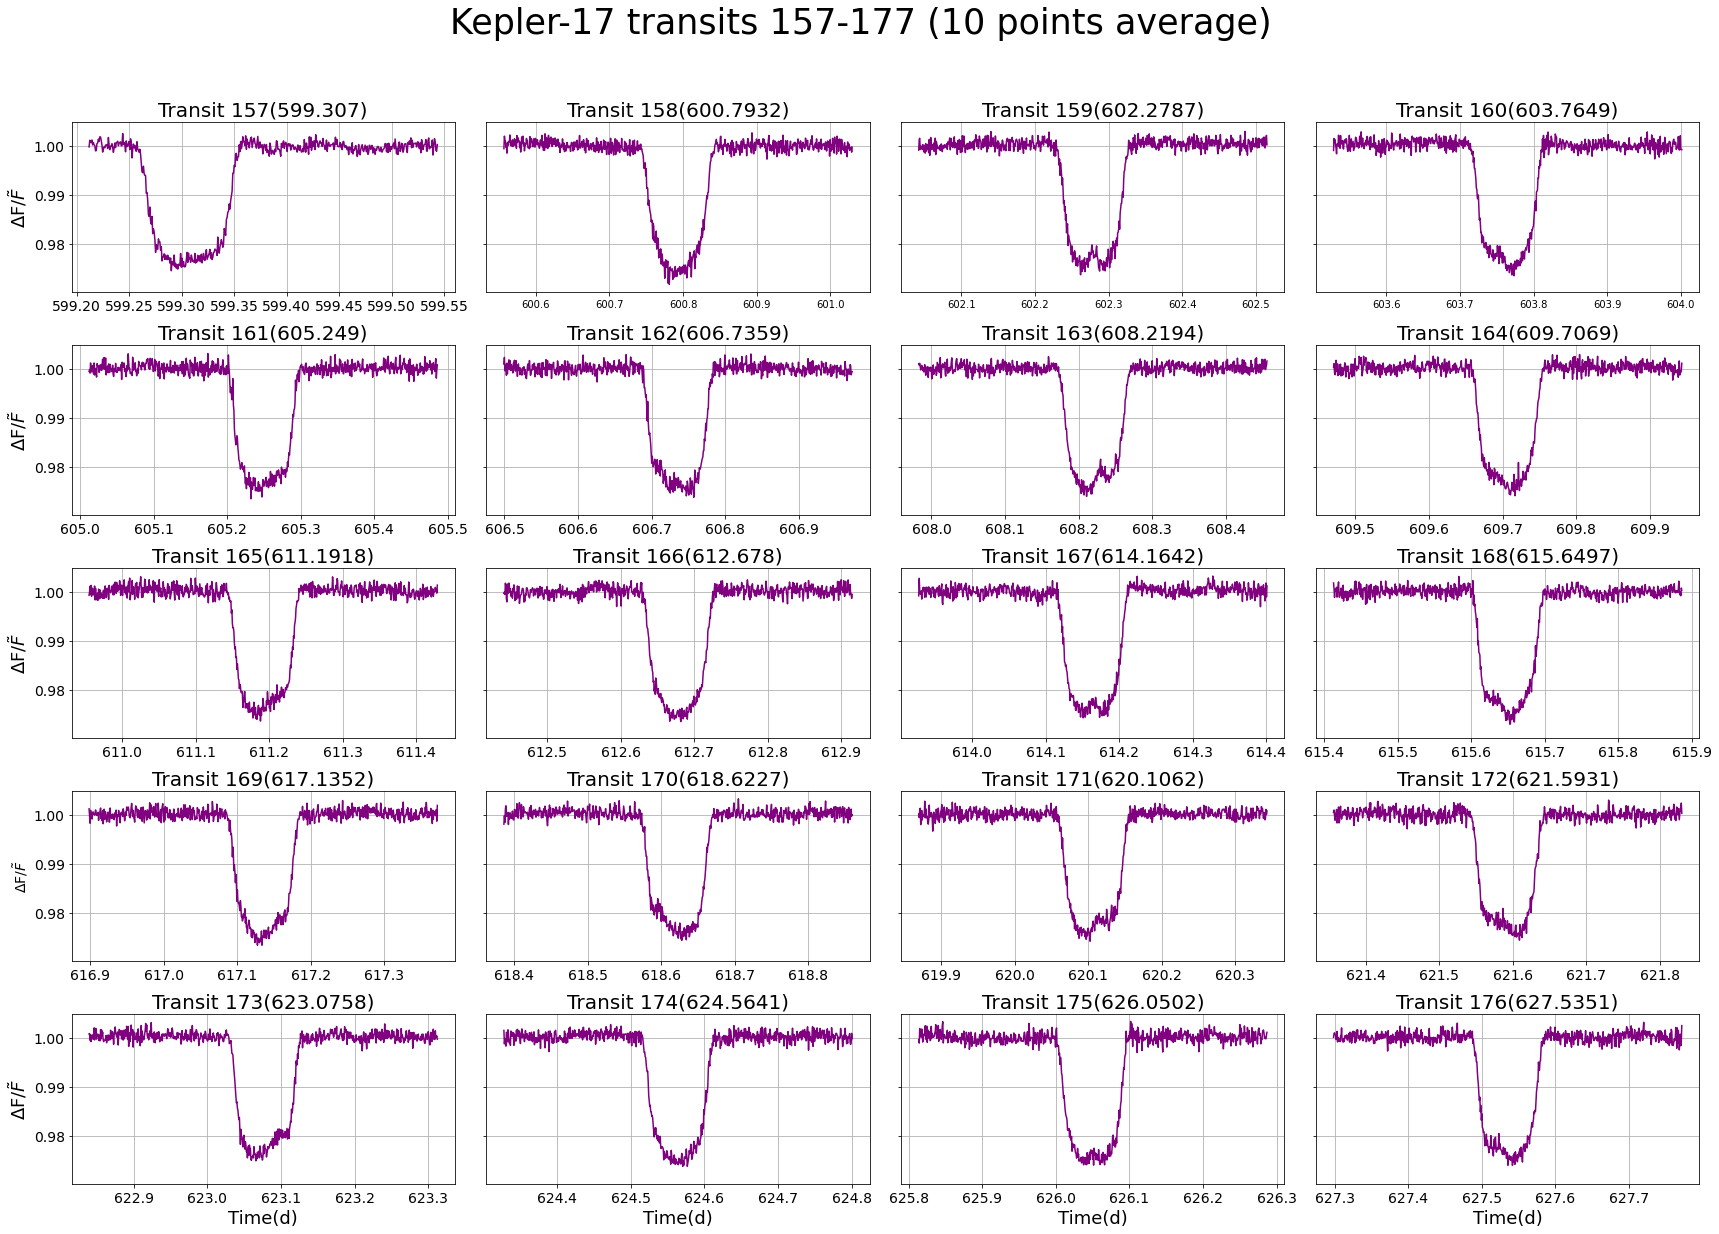

In [5]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(8*3, 6*3),sharex=False, sharey=True)
fig.suptitle('Kepler-17 transits 157-177 (10 points average)',fontsize=35) ### namely transit 79-96 ###

for i,v in enumerate(kepler_17):
#     print(v)
    '''load in data'''
    data = np.loadtxt(v) ### edit ver.

    x_time = data[:, 0]
    y_flux = data[:, 1]

    x_time = pd.Series(x_time)
    y_flux = pd.Series(y_flux)
    x_time_m = x_time[y_flux < 0.999].values
    y_flux_m = y_flux[y_flux < 0.999].values
    
    n = len(x_time_m)                          #the number of data
    mean = sum(x_time_m*y_flux_m)/ sum(y_flux_m)                  #note this correction
    sigma = np.sqrt(sum(y_flux_m * (x_time_m - mean)**2) / sum(y_flux_m))     #note this correction
    popt, pcov = curve_fit(func, x_time_m, y_flux_m, p0=[min(y_flux_m),mean,sigma, 0], maxfev =10000)
    
    ym = func(x_time_m, *popt)
    
    '''cut mid point'''
    x_time_m = pd.Series(x_time_m)
    ym = pd.Series(ym)
    for ym_ind, ym_val in enumerate(ym):
        if ym_val == np.min(ym):
            mid_point = x_time_m[ym_ind]
            mid_point = np.around(mid_point,4)


    x_time = pd.Series(x_time)
    y_flux = pd.Series(y_flux)

    bdL = mid_point-0.24 # boundary left
    bdR = mid_point+0.24 # boundary right
#     print(bdL,bdR)

    x_time_new0 = x_time[x_time>=bdL][x_time<=bdR]
    y_flux_new0 = y_flux[x_time>=bdL][x_time<=bdR]
    
    '''sigma selection'''
    TML = mid_point-0.1/2
    TMR = mid_point+0.1/2
#     print(TML,TMR)
    
    ### individual parts ###
    x_time_L = x_time[x_time <= TML]
    x_time_M = x_time[x_time > TML][x_time < TMR]
    x_time_R = x_time[x_time >= TMR]

    y_flux_L = y_flux[x_time <= TML]
    y_flux_M = y_flux[x_time > TML][x_time < TMR]
    y_flux_R = y_flux[x_time >= TMR]

    ### combine 2 sides ###
    x_time_L = list(x_time_L)
    x_time_R = list(x_time_R)
    y_flux_L = list(y_flux_L)
    y_flux_R = list(y_flux_R)
    x_time_sides = x_time_L + x_time_R
    y_flux_sides = y_flux_L + y_flux_R
    x_time_sides = pd.Series(x_time_sides)
    y_flux_sides = pd.Series(y_flux_sides)

    ### sides sigma ###
    y_flux_sidesMean = y_flux_sides.mean()
    y_sigma1_sides = y_flux_sidesMean - 3*np.std(y_flux_sides) # low
    y_sigma2_sides = y_flux_sidesMean + 3*np.std(y_flux_sides) # up

    y_flux_Sigma_sides = y_flux_sides[y_flux_sides>y_sigma1_sides][y_flux_sides<y_sigma2_sides]
    x_time_Sigma_sides = x_time_sides[y_flux_sides>y_sigma1_sides][y_flux_sides<y_sigma2_sides]
    
    ### middle noise take out ###
    x_time_M_noise = x_time_M [y_flux_M < 1.01]
    y_flux_M_noise = y_flux_M [y_flux_M < 1.01]

    ### combine 3 parts ###
    y_flux_SigmaL = y_flux_Sigma_sides[x_time_Sigma_sides <= TML]
    x_time_SigmaL = x_time_Sigma_sides[x_time_Sigma_sides <= TML]
    y_flux_SigmaR = y_flux_Sigma_sides[x_time_Sigma_sides >= TMR]
    x_time_SigmaR = x_time_Sigma_sides[x_time_Sigma_sides >= TMR]

    y_flux_SigmaL = list(y_flux_SigmaL)
    x_time_SigmaL = list(x_time_SigmaL)
    y_flux_SigmaR = list(y_flux_SigmaR)
    x_time_SigmaR = list(x_time_SigmaR)
    y_flux_M_noise = list(y_flux_M_noise)
    x_time_M_noise = list(x_time_M_noise)

    y_flux_Sigma = y_flux_SigmaL + y_flux_M_noise + y_flux_SigmaR
    x_time_Sigma = x_time_SigmaL + x_time_M_noise + x_time_SigmaR

    x_time_Sigma = pd.Series(x_time_Sigma)
    y_flux_Sigma = pd.Series(y_flux_Sigma)

    x_time_new1 = x_time_Sigma[x_time_Sigma>=bdL][x_time_Sigma<=bdR]
    y_flux_new1 = y_flux_Sigma[x_time_Sigma>=bdL][x_time_Sigma<=bdR]
    
    '''doing car box average'''
    y_flux_new_ind = y_flux_new1.reset_index(drop=True)
    x_time_new_ind = x_time_new1.reset_index(drop=True)
    length = len(x_time_new1)
    
    average_flux10 = []
    average_time10 = []
    ### average flux (10 step) ###
    for i_fn,v_fn in enumerate(y_flux_new_ind): # flux
        if i_fn < (length-10+1):
            flux_nor_lowres_n = np.linspace(y_flux_new_ind[i_fn],y_flux_new_ind[i_fn+9],10)
            average_n = np.mean(flux_nor_lowres_n)
            average_flux10.append(average_n)
    else:
        pass

    ### compute phase average (10 step) ###
    for i_t,v_t in enumerate(x_time_new_ind): # time
        if i_t < (length-10+1):
            time_n = np.linspace(x_time_new_ind[i_t],x_time_new_ind[i_t+9],10)
            t_average_n = np.mean(time_n)
            average_time10.append(t_average_n)

        else:
            pass


    '''save as txt file''' # 10 steps
    table_test_mean10 = pd.DataFrame([],columns= ['time','flux'])
    table_test_mean10['time'] = pd.Series(average_time10)
    table_test_mean10['flux'] = pd.Series(average_flux10)
    print("KIC_17-2010265121752_slc_"+str(157+i)+"-10s_mean.txt")
    print("Transit "+str(157+i)+' = '+str(mid_point))
    
    np.savetxt("KIC_17-2010265121752_slc_"+str(157+i)+"-10s_mean.txt", table_test_mean10)


    '''plot'''
    if i <= 3:
        ax[0,i].plot(average_time10, average_flux10,'-',color='purple')
        ax[0,0].set_ylabel("$\Delta$F/$\~F$",fontsize=18)
        ax[0,0].tick_params(axis='x', labelsize=14)
        ax[0,0].tick_params(axis='y', labelsize=14)
        ax[0,i].set_title('Transit '+str(157+i)+'('+str(mid_point)+')',fontsize=20)
        ax[0,i].grid()
    
    elif 4 <= i <= 7:
        ax[1,i-4].plot(average_time10, average_flux10,'-',color='purple')
        ax[1,0].set_ylabel("$\Delta$F/$\~F$",fontsize=18)
        ax[1,i-4].tick_params(axis='x', labelsize=14)
        ax[1,0].tick_params(axis='y', labelsize=14)
        ax[1,i-4].set_title('Transit '+str(157+i)+'('+str(mid_point)+')',fontsize=20)
        ax[1,i-4].grid()
        
    elif 8 <= i <= 11:
        ax[2,i-8].plot(average_time10, average_flux10,'-',color='purple')
        ax[2,0].set_ylabel("$\Delta$F/$\~F$",fontsize=18)
        ax[2,i-8].tick_params(axis='x', labelsize=14)
        ax[2,0].tick_params(axis='y', labelsize=14)
        ax[2,i-8].set_title('Transit '+str(157+i)+'('+str(mid_point)+')',fontsize=20)
        ax[2,i-8].grid()
        
    elif 12 <= i <= 15:
        ax[3,i-12].plot(average_time10, average_flux10,'-',color='purple')
        ax[3,0].set_ylabel("$\Delta$F/$\~F$",fontsize=14)
        ax[3,i-12].tick_params(axis='x', labelsize=14)
        ax[3,0].tick_params(axis='y', labelsize=14)
        ax[3,i-12].set_title('Transit '+str(157+i)+'('+str(mid_point)+')',fontsize=20)

           
        ax[3,i-12].grid()
    
    elif 16 <= i <= 19:
        ax[4,i-16].plot(average_time10, average_flux10,'-',color='purple')
        ax[4,0].set_ylabel("$\Delta$F/$\~F$",fontsize=18)
        ax[4,i-16].set_xlabel("Time(d)",fontsize=18)
        ax[4,i-16].tick_params(axis='x', labelsize=14)
        ax[4,0].tick_params(axis='y', labelsize=14)
        ax[4,i-16].set_title('Transit '+str(157+i)+'('+str(mid_point)+')',fontsize=20)
        ax[4,i-16].grid()
        
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()